In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()
df.describe()
df['condition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


condition
0    160
1    137
Name: count, dtype: int64

In [4]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

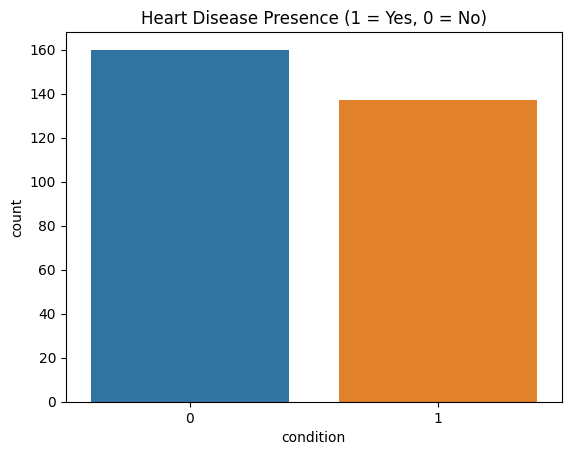

In [5]:
sns.countplot(x='condition', data=df)
plt.title('Heart Disease Presence (1 = Yes, 0 = No)')
plt.show()


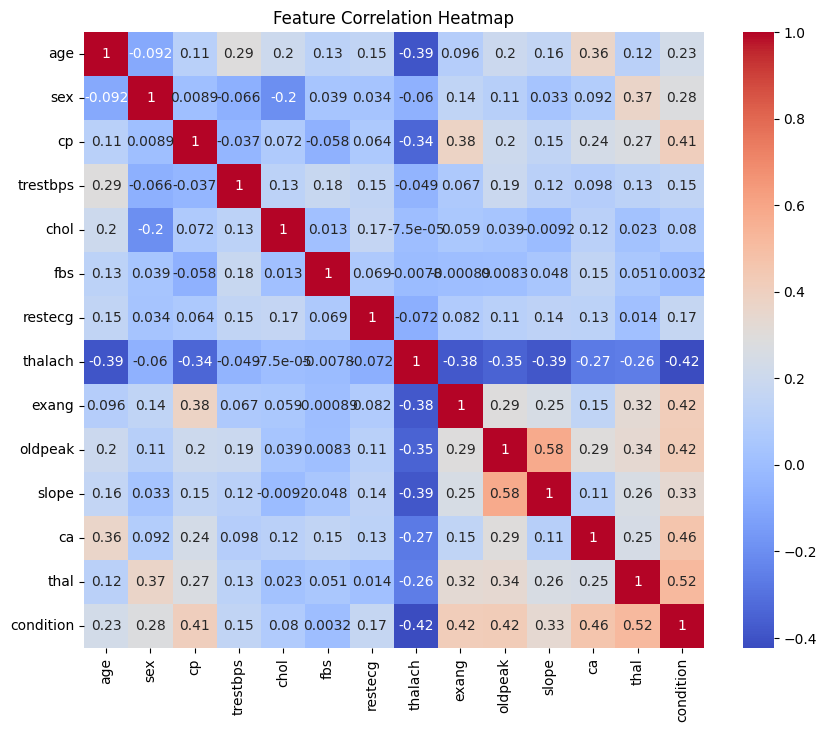

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [7]:
x=df.drop('condition',axis=1)
y=df['condition']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
scaler=StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_cols] = scaler.fit_transform(df[num_cols])
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
model=LogisticRegression()                                                                                                        u
y_pred=model.predict(x_test_scaled)

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



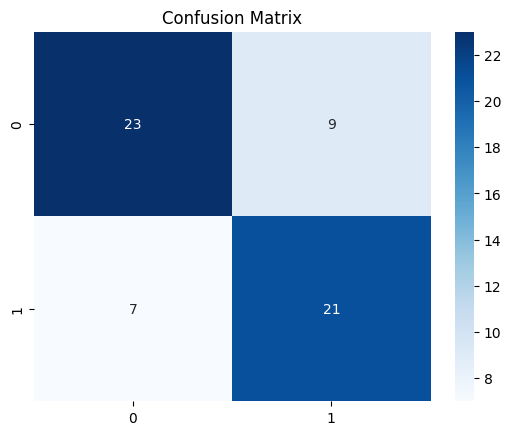

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [11]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "SVM":SVC(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB()
}

In [12]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.77
Random Forest Accuracy: 0.70
SVM Accuracy: 0.73
KNN Accuracy: 0.73
Naive Bayes Accuracy: 0.77


In [13]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train_scaled, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters for Random Forest: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8688829787234044


In [14]:
best_rf = grid_search.best_estimator_
y_pred_train = best_rf.predict(x_train_scaled)
y_pred_test = best_rf.predict(x_test_scaled)
print(f"Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print("\nClassification Report (Test Data):\n")
print(classification_report(y_test, y_pred_test))


Random Forest Train Accuracy: 0.895
Random Forest Test Accuracy: 0.750

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
pipeline = Pipeline([('scaler', StandardScaler()),      
('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=3,
        max_features='sqrt',
        random_state=42
    ))
])
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
pipeline.fit(x_train, y_train)
test_acc = pipeline.score(x_test, y_test)
print("Test Accuracy:", test_acc)

Cross-validation scores: [0.8125     0.75       0.82978723 0.91489362 0.82978723]
Mean CV Accuracy: 0.8273936170212766
Test Accuracy: 0.8666666666666667
